In [43]:
!pip install bayesian-optimization

In [44]:
!pip install optuna


In [45]:


import numpy as np #Operaciones matemáticas rápidas sobre matrices
import pandas as pd #biblioteca de análisis y manipulación de datos para Python
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns #permite generar fácilmente gráficos
import statsmodels.api as sm

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # Importar el clasificador SVM
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

In [46]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
# Especifica la ruta al archivo en Google Drive
file_path = '/content/drive/My Drive/DATASET_BALANCEADO_LIST.csv'
df = pd.read_csv(file_path)
df

,DIA,HORA_INFRACCION,ARMA,EDAD,LUGAR,SEXO,ANTECEDENTES,AREA_DEL_HECHO,DISTRITO,PRESUNTA_MOTIVACION
0,3,0,1,1,1,1,1,1,2,1
1,3,2,2,2,1,1,1,1,1,2
2,2,0,2,2,2,1,1,1,1,2
3,4,2,1,3,1,1,1,1,3,1
4,3,3,1,2,1,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...
11763,4,2,5,4,2,2,2,2,3,6
11764,4,2,5,4,2,2,2,2,3,6
11765,4,2,5,4,2,2,2,2,3,6
11766,4,2,5,4,2,2,2,2,3,6


In [48]:


#verifico datos nulos
df.isnull().sum()

,0
DIA,0
HORA_INFRACCION,0
ARMA,0
EDAD,0
LUGAR,0
SEXO,0
ANTECEDENTES,0
AREA_DEL_HECHO,0
DISTRITO,0
PRESUNTA_MOTIVACION,0


In [49]:

ds=pd.DataFrame(df)
#Presenta el numero de filas
print("El número de filas(observaciones) es: ",ds.shape[0])

#Presenta el numero de columnas
print("El número de columnas(variables) es: ",len(ds.columns))

El número de filas(observaciones) es:  11768
El número de columnas(variables) es:  10


In [50]:

# tipos de la variables
ds.dtypes

,0
DIA,int64
HORA_INFRACCION,int64
ARMA,int64
EDAD,int64
LUGAR,int64
SEXO,int64
ANTECEDENTES,int64
AREA_DEL_HECHO,int64
DISTRITO,int64
PRESUNTA_MOTIVACION,int64


In [51]:
print(df['PRESUNTA_MOTIVACION'].unique())# datos en texto

[1 2 3 4 5 6]


In [52]:
print(df['DISTRITO'].unique())# datos en texto

[2 1 3]


In [53]:
print(df['ANTECEDENTES'].unique())# datos en texto

[1 2]


In [54]:
print(df['AREA_DEL_HECHO'].unique())# datos en texto

[1 2]


In [55]:
print(df['LUGAR'].unique())# datos en texto

[1 2]


In [56]:
print(df['DIA'].unique())# datos en texto

[3 2 4 1]


In [57]:
df['DIA'].value_counts()

,count
DIA,
1,3941
2,2717
3,2700
4,2410


In [58]:
print(df['EDAD'].unique())# datos en texto

[1 2 3 4]


In [59]:
print(df['HORA_INFRACCION'].unique())# datos en texto

[0 2 3 1]


In [60]:
print(df['ARMA'].unique())# datos en texto

[1 2 3 4 5]


In [61]:
print(df['SEXO'].unique())# datos en texto

[1 2]


In [62]:
df.head()

,DIA,HORA_INFRACCION,ARMA,EDAD,LUGAR,SEXO,ANTECEDENTES,AREA_DEL_HECHO,DISTRITO,PRESUNTA_MOTIVACION
0,3,0,1,1,1,1,1,1,2,1
1,3,2,2,2,1,1,1,1,1,2
2,2,0,2,2,2,1,1,1,1,2
3,4,2,1,3,1,1,1,1,3,1
4,3,3,1,2,1,1,1,1,1,2


In [63]:
df.sample(10)

,DIA,HORA_INFRACCION,ARMA,EDAD,LUGAR,SEXO,ANTECEDENTES,AREA_DEL_HECHO,DISTRITO,PRESUNTA_MOTIVACION
11590,4,2,5,4,2,2,2,2,3,6
3704,1,2,1,2,1,1,1,1,2,2
4174,1,2,1,3,1,1,1,1,2,2
1366,1,3,1,1,1,1,2,1,1,1
2119,3,0,1,1,1,1,2,1,1,2
162,3,3,3,1,2,1,2,1,1,3
7462,1,0,2,1,1,2,2,2,1,1
3216,2,2,1,2,1,1,1,1,2,2
8631,2,0,3,1,2,2,2,2,1,3
8704,2,1,3,1,2,2,2,2,1,3


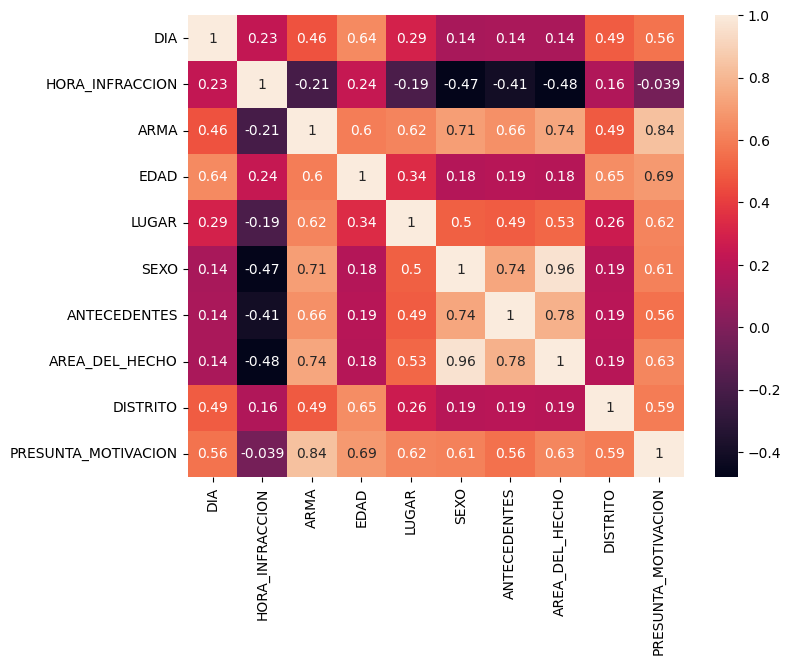

In [64]:

#corelacion
corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

In [65]:

X = df.iloc[:, [2,7,9,0,8,5,4,6,3]] # atributos de entrada seran las primeras columnas
Y = df.iloc[:,[1]] # atributos de destino

#presentacion de los atributos de entrada
X.head()

,ARMA,AREA_DEL_HECHO,PRESUNTA_MOTIVACION,DIA,DISTRITO,SEXO,LUGAR,ANTECEDENTES,EDAD
0,1,1,1,3,2,1,1,1,1
1,2,1,2,3,1,1,1,1,2
2,2,1,2,2,1,1,2,1,2
3,1,1,1,4,3,1,1,1,3
4,1,1,2,3,1,1,1,1,2


In [66]:

#presentacion de los atributos de destino
Y.head()

,HORA_INFRACCION
0,0
1,2
2,0
3,2
4,3


In [67]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=7)

print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 9414 datos para entrenamiento y 2354 datos para prueba


In [26]:


X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9414 entries, 80 to 9412
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ARMA                 9414 non-null   int64
 1   AREA_DEL_HECHO       9414 non-null   int64
 2   PRESUNTA_MOTIVACION  9414 non-null   int64
 3   DIA                  9414 non-null   int64
 4   DISTRITO             9414 non-null   int64
 5   SEXO                 9414 non-null   int64
 6   LUGAR                9414 non-null   int64
 7   ANTECEDENTES         9414 non-null   int64
 8   EDAD                 9414 non-null   int64
dtypes: int64(9)
memory usage: 735.5 KB


In [27]:
import optuna
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score

# Función para evaluar el modelo SVM con diferentes kernels, parámetros C y decision_function_shape
def svm_evaluate(trial):
    # Sugerir un valor para el parámetro C entre 1 y 100
    C = trial.suggest_float('C', 1, 100)

    # Sugerir el tipo de kernel como un valor categórico
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])

    # Sugerir la estrategia 'ovo' (uno contra uno) o 'ovr' (uno contra todos)
    decision_function_shape = trial.suggest_categorical('decision_function_shape', ['ovo', 'ovr'])

    # Crear el clasificador SVM con los parámetros sugeridos
    svc = SVC(C=C, kernel=kernel, decision_function_shape=decision_function_shape, random_state=7)

    # Ajustar el modelo con los datos de entrenamiento
    svc.fit(X_train, y_train.values.ravel())

    # Realizar predicciones en el conjunto de prueba
    y_pred = svc.predict(X_test)

    # Retornar el precision_score como métrica a optimizar
    return precision_score(y_test, y_pred, average='micro')

# Definir el estudio de Optuna para maximizar la precisión
study = optuna.create_study(direction='maximize')

# Ejecutar la optimización (n_trials = número de intentos)
study.optimize(svm_evaluate, n_trials=25)

# Obtener los mejores parámetros encontrados
best_params = study.best_params
print("Mejores hiperparámetros encontrados:", best_params)

# Obtener la mejor precisión alcanzada
best_precision = study.best_value
print(f"La mejor precisión alcanzada es: {best_precision * 100:.2f}%")

[I 2024-12-09 13:49:30,754] A new study created in memory with name: no-name-ef3f71da-4d33-4300-86ca-b13c3bd7959b
[I 2024-12-09 13:49:46,366] Trial 0 finished with value: 0.6656754460492779 and parameters: {'C': 35.54052885197928, 'kernel': 'rbf', 'decision_function_shape': 'ovo'}. Best is trial 0 with value: 0.6656754460492779.
[I 2024-12-09 14:05:48,303] Trial 1 finished with value: 0.6614273576890399 and parameters: {'C': 20.07058485436863, 'kernel': 'poly', 'decision_function_shape': 'ovo'}. Best is trial 0 with value: 0.6656754460492779.
[I 2024-12-09 14:05:53,631] Trial 2 finished with value: 0.64910790144435 and parameters: {'C': 6.493945638013186, 'kernel': 'linear', 'decision_function_shape': 'ovo'}. Best is trial 0 with value: 0.6656754460492779.
[I 2024-12-09 14:06:02,151] Trial 3 finished with value: 0.22132540356839422 and parameters: {'C': 25.29683666725342, 'kernel': 'sigmoid', 'decision_function_shape': 'ovo'}. Best is trial 0 with value: 0.6656754460492779.
[I 2024-12-

Mejores hiperparámetros encontrados: {'C': 49.48374413723842, 'kernel': 'rbf', 'decision_function_shape': 'ovr'}
La mejor precisión alcanzada es: 66.86%


In [68]:
# Cargamos la librería Support Vector Classifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Llamamos al constructor de Support Vector Machine
classifier = SVC(kernel='rbf', C=49.48, decision_function_shape='ovr')

# Entrenamos el modelo
svm_modelo = classifier.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred = classifier.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:

# Resumen de las predicciones hechas por el clasificador
from sklearn import metrics
reporte = metrics.classification_report(y_test, y_pred,output_dict=True)
pre = pd.DataFrame(reporte).transpose()
print(pre)
pre.to_excel("resumen_hora.xlsx")

              precision    recall  f1-score      support
0              0.833713  0.686679  0.753086   533.000000
1              0.937028  0.670270  0.781513   555.000000
2              0.852090  0.419304  0.562036   632.000000
3              0.473074  0.900631  0.620315   634.000000
accuracy       0.668649  0.668649  0.668649     0.668649
macro avg      0.773976  0.669221  0.679238  2354.000000
weighted avg   0.765875  0.668649  0.672736  2354.000000


In [70]:
from sklearn import metrics
import pandas as pd

reporte = metrics.classification_report(y_test, y_pred, output_dict=True)

# Extraer solo la precisión de cada clase, excluyendo métricas agregadas
precision = {class_name: metrics['precision'] for class_name, metrics in reporte.items() if isinstance(metrics, dict)}

# Convertir a DataFrame
precision_df = pd.DataFrame(list(precision.items()), columns=['Clase', 'Precisión'])

# Imprimir el DataFrame
print(precision_df)


          Clase  Precisión
0             0   0.833713
1             1   0.937028
2             2   0.852090
3             3   0.473074
4     macro avg   0.773976
5  weighted avg   0.765875


In [71]:

y_test.head()

,HORA_INFRACCION
2456,1
8817,1
5046,3
2821,2
247,3


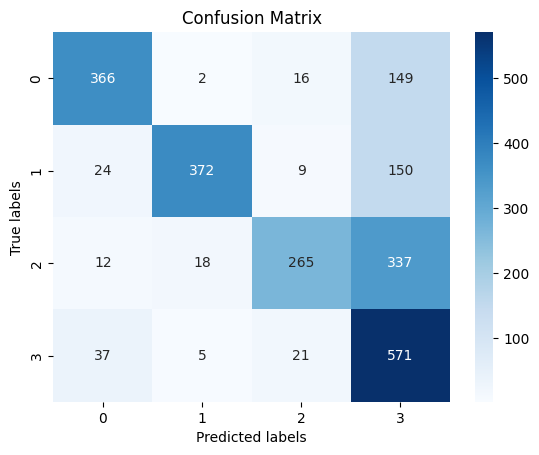

In [72]:

#Matriz de confusion
matriz=confusion_matrix(y_test, y_pred)
ax= plt.subplot()
sns.heatmap(matriz, annot=True, cmap="Blues",fmt='g');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

In [73]:

cm = confusion_matrix(y_test, y_pred)

mc= pd.DataFrame(cm)
print(mc)
mc.to_excel("matriz_confusion_hora.xlsx")

     0    1    2    3
0  366    2   16  149
1   24  372    9  150
2   12   18  265  337
3   37    5   21  571


In [74]:

#Para concatenar variables
import pandas as pd

prediccion = pd.DataFrame(y_pred,columns=['hora_prediccion'])
original = y_test
original.reset_index(drop=True, inplace=True)
df_combined = pd.concat([prediccion,original], axis=1)
df_combined.head(10)


,hora_prediccion,HORA_INFRACCION
0,3,1
1,1,1
2,3,3
3,0,2
4,3,3
5,2,2
6,1,1
7,3,3
8,1,1
9,3,2


In [75]:
from sklearn import model_selection
from sklearn.metrics import make_scorer, precision_score, accuracy_score, recall_score

def v_cruzada_svm(svm_modelo, X_train, y_train):
    # Convertir y_train a un array unidimensional
    y_train = y_train.values.ravel()

    # Definir los scorers para precisión, accuracy y recall
    precision_scorer = make_scorer(precision_score, average='micro')
    accuracy_scorer = make_scorer(accuracy_score)  # No necesita parámetro average
    recall_scorer = make_scorer(recall_score, average='micro')

    seed = 7
    kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle=True)  # shuffle para activar el random state

    # Realiza la validación cruzada para precisión
    cv_results_precision = model_selection.cross_val_score(svm_modelo, X_train, y_train, cv=kfold, scoring=precision_scorer)
    print("Iteraciones validación cruzada (Precisión):\n", cv_results_precision)
    msg_precision = "%f (%f)" % (cv_results_precision.mean(), cv_results_precision.std())
    print("Precisión media:\n", msg_precision)

    # Realiza la validación cruzada para accuracy
    cv_results_accuracy = model_selection.cross_val_score(svm_modelo, X_train, y_train, cv=kfold, scoring=accuracy_scorer)
    print("Iteraciones validación cruzada (Accuracy):\n", cv_results_accuracy)
    msg_accuracy = "%f (%f)" % (cv_results_accuracy.mean(), cv_results_accuracy.std())
    print("Accuracy media:\n", msg_accuracy)

    # Realiza la validación cruzada para recall
    cv_results_recall = model_selection.cross_val_score(svm_modelo, X_train, y_train, cv=kfold, scoring=recall_scorer)
    print("Iteraciones validación cruzada (Recall):\n", cv_results_recall)
    msg_recall = "%f (%f)" % (cv_results_recall.mean(), cv_results_recall.std())
    print("Recall media:\n", msg_recall)




In [76]:
v_cruzada_svm(svm_modelo, X_train, y_train)

Iteraciones validación cruzada (Precisión):
 [0.67657993 0.67073818 0.66489644 0.67073818 0.67959617]
Precisión media:
 0.672510 (0.005119)
Iteraciones validación cruzada (Accuracy):
 [0.67657993 0.67073818 0.66489644 0.67073818 0.67959617]
Accuracy media:
 0.672510 (0.005119)
Iteraciones validación cruzada (Recall):
 [0.67657993 0.67073818 0.66489644 0.67073818 0.67959617]
Recall media:
 0.672510 (0.005119)


In [77]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Assuming y_pred and y_test are defined
print('Precision: ', precision_score(y_test, y_pred, average='micro') * 100)
print('Accuracy: ', accuracy_score(y_test, y_pred) * 100)
print('Recall: ', recall_score(y_test, y_pred, average='micro') * 100)

Precision:  66.86491079014444
Accuracy:  66.86491079014444
Recall:  66.86491079014444


In [78]:
df_combined['HORA_INFRACCION'] = df_combined['HORA_INFRACCION'].apply(lambda x:
                                                                  'H01 hasta H06' if x == 0 else
                                                                  'H07 hasta H12' if x == 1 else
                                                                  'H13 hasta H18' if x == 2 else
                                                                  'H19 hasta H00'
                                                                 )





In [79]:
df_combined['hora_prediccion'] = df_combined['hora_prediccion'].apply(lambda x:
                                                                  'H01 hasta H06' if x == 0 else
                                                                  'H07 hasta H12' if x == 1 else
                                                                  'H13 hasta H18' if x == 2 else
                                                                  'H19 hasta H00'
                                                                 )




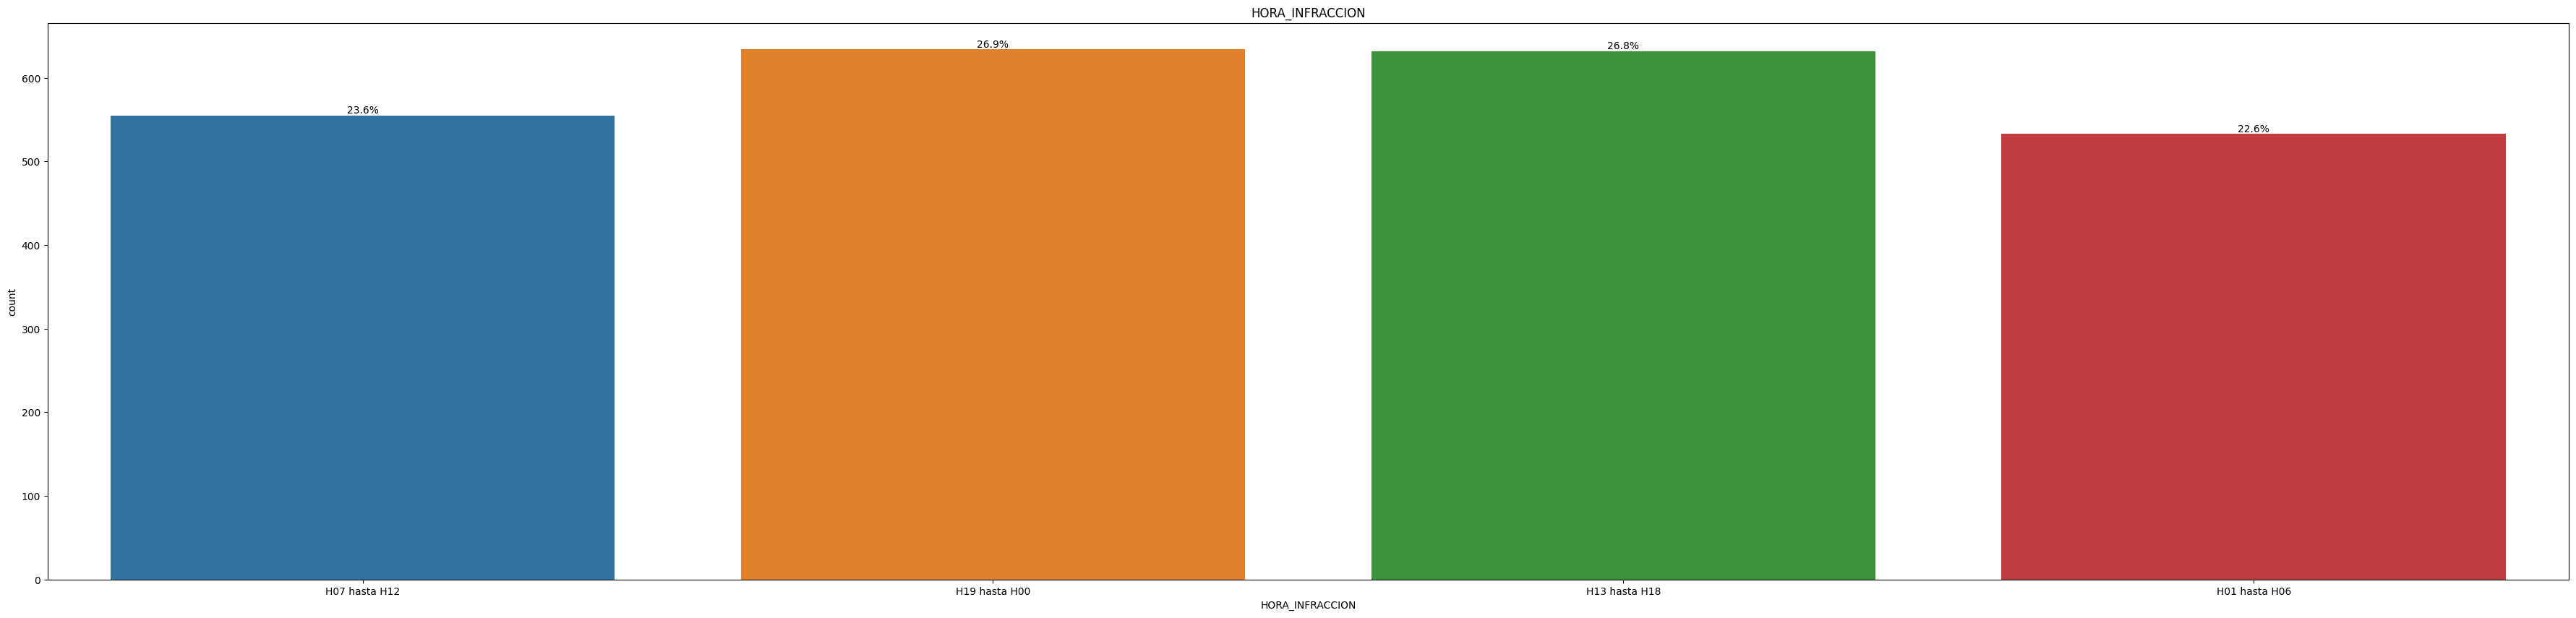

In [80]:

import seaborn as sns #permite generar fácilmente elegantes gráficos, proporciona una interfaz de alto nivel que es realmente sencilla de aprender.
ax = plt.subplots(figsize = (45,10))
ncount=len(df_combined)
sns.countplot(x='HORA_INFRACCION',hue = 'HORA_INFRACCION', data = df_combined, ax = ax[1]) #Muestre el conteo de observaciones en cada contenedor categórico usando barras.
ax[1].set_title('HORA_INFRACCION')

for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom') # set the alignment of the text

#Guardamos la figura de barras original
ax[0].savefig("barras_original_HORA_INFRACCION.png")

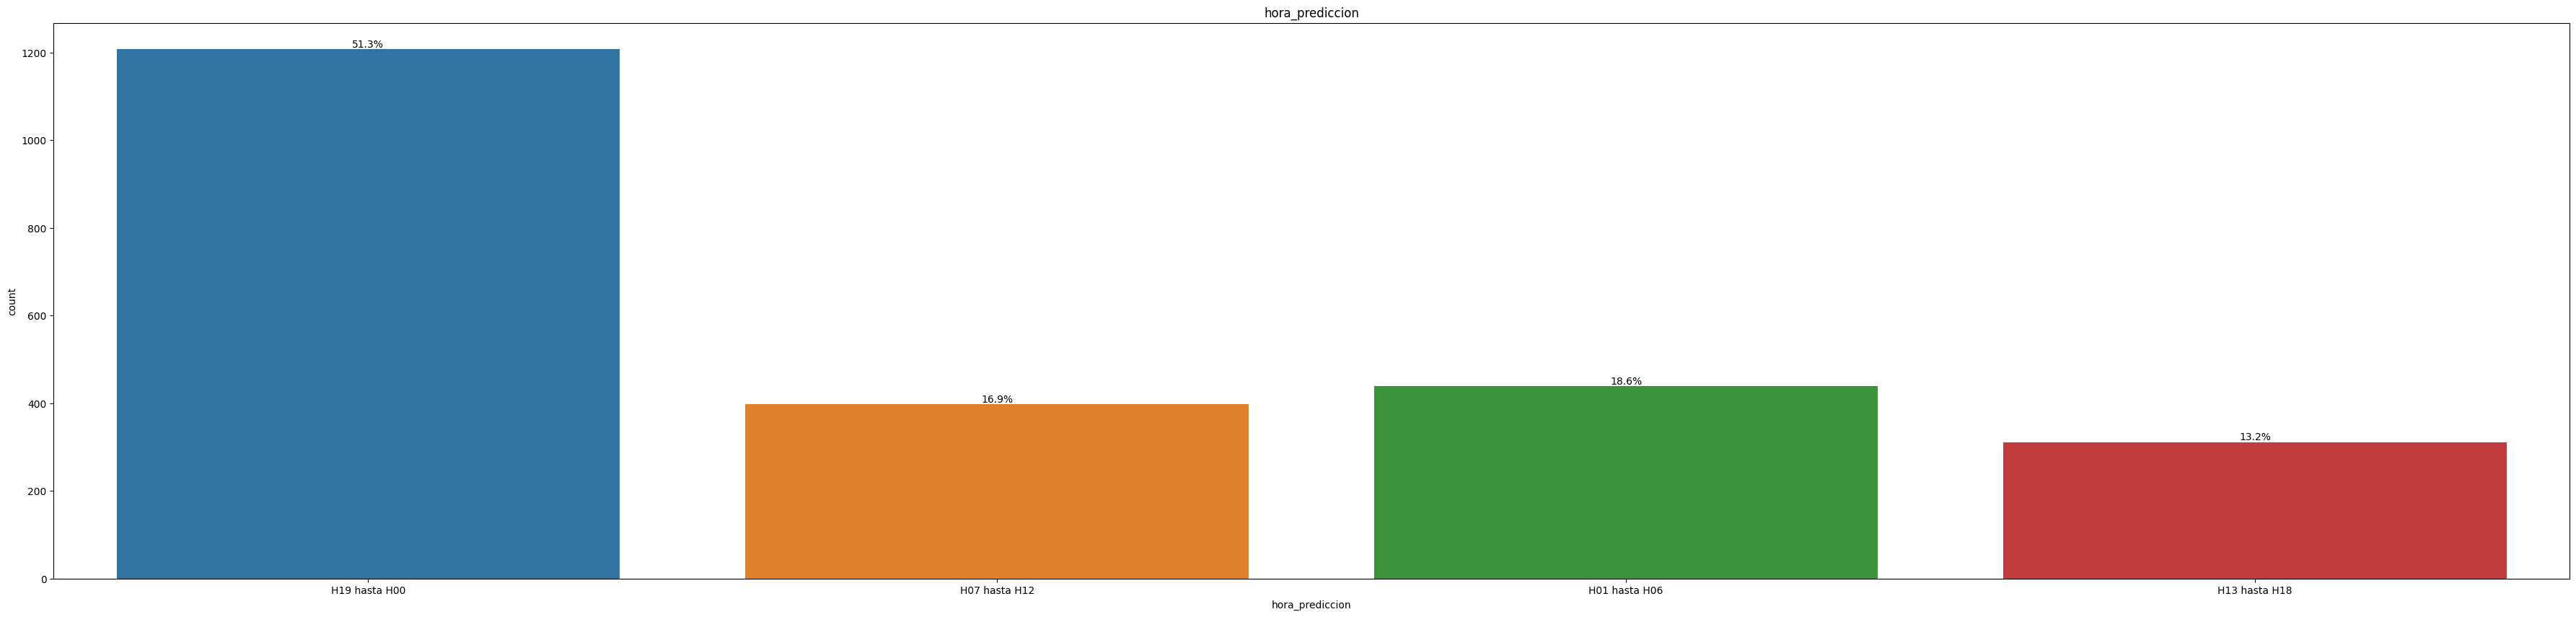

In [81]:


ax = plt.subplots(figsize = (45,10))
ncount=len(df_combined)
sns.countplot(x='hora_prediccion',hue = 'hora_prediccion', data = df_combined, ax = ax[1]) #Muestre el conteo de observaciones en cada contenedor categórico usando barras.
ax[1].set_title('hora_prediccion')


for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom') # set the alignment of the text

#Guardamos la figura de barras de predicción
ax[0].savefig("barras_prediccion_hora.png")

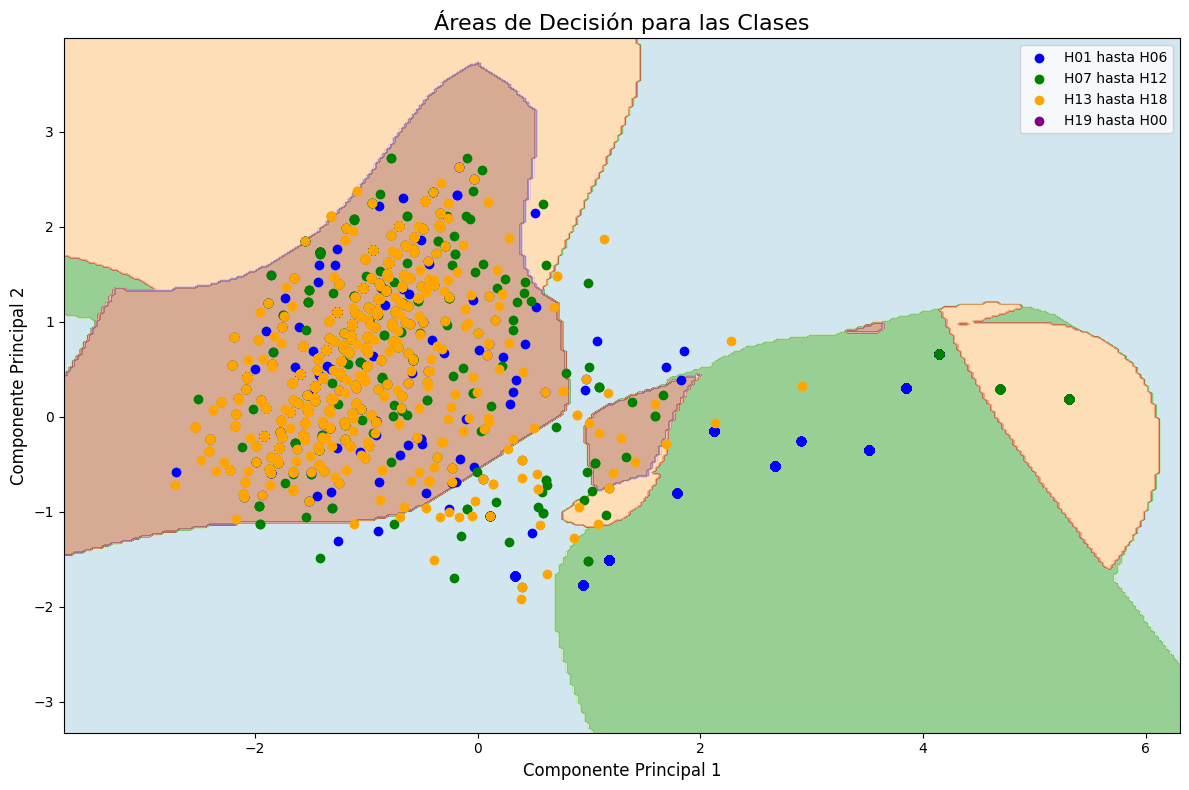

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Reducir las dimensiones con PCA
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)

# Entrenar el modelo SVM con las 2 dimensiones reducidas
classifier_pca = SVC(kernel='rbf', C=49.48, decision_function_shape='ovr')
classifier_pca.fit(X_train_2D, y_train.values.ravel())

# Crear una malla para la visualización
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Obtener las predicciones para cada punto en la malla
Z = classifier_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar el área de decisión
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Paired)  # Regiones de decisión

# Colores y etiquetas para las 4 clases
class_labels = {
    1: 'H01 hasta H06',
    2: 'H07 hasta H12',
    3: 'H13 hasta H18',
    4: 'H19 hasta H00'

}
colors = ['blue', 'green', 'orange', 'purple']

# Graficar los puntos de las clases
for class_value, color in zip(class_labels.keys(), colors):
    plt.scatter(
        X_train_2D[y_train.values.ravel() == class_value, 0],
        X_train_2D[y_train.values.ravel() == class_value, 1],
        color=color,
        label=class_labels[class_value]
    )

# Etiquetas y título
plt.title('Áreas de Decisión para las Clases', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.tight_layout()

# Mostrar la gráfica
plt.show()